# Importing Libraries

In [406]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
import mplcyberpunk
plt.style.use("cyberpunk")

# Importing Data

|column|Description|
|----|---|
|Doctor Name| The full name of the healthcare professional.|
|City| The city in which the doctor's clinic is based, providing geographical context.|
|Specialization| The specific area of medical expertise or specialization of the doctor.|
|Doctor Qualification| The highest educational qualification attained by the doctor.|
|Experience(Years)| The total number of years of professional experience the doctor has accumulated.|
|Total_Reviews| The cumulative number of reviews given by patients, reflecting the overall feedback received.|
|Patient Satisfaction Rate(%age)| The percentage indicating the level of satisfaction reported by patients who have received medical care from the doctor.|
|Avg Time to Patients(mins)| The average amount of time the doctor spends with each patient during consultations.|
|Wait Time(mins)| The average waiting time experienced by patients at the clinic before their consultation.|
|Hospital Address| The name and location of the hospital or clinic where the doctor practices.|
|Doctors Link| An online access link or platform where patients can connect with the doctor, reflecting the growing trend of digital healthcare.|
|Doctor Fee(PKR)| The fee charged by the doctor for their services, measured in Pakistani Rupees (PKR).|

In [407]:
df = pd.read_csv("DoctorFeePrediction_Milestone2.csv")

# Text Data Preprocessing

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Doctor Name                      2386 non-null   object 
 1   City                             2386 non-null   object 
 2   Specialization                   2386 non-null   object 
 3   Doctor Qualification             2386 non-null   object 
 4   Experience(Years)                2386 non-null   float64
 5   Total_Reviews                    2386 non-null   int64  
 6   Patient Satisfaction Rate(%age)  2386 non-null   int64  
 7   Avg Time to Patients(mins)       2386 non-null   int64  
 8   Wait Time(mins)                  2386 non-null   int64  
 9   Hospital Address                 2386 non-null   object 
 10  Doctors Link                     2386 non-null   object 
 11  Fee Category                     2386 non-null   object 
dtypes: float64(1), int64

In [409]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Experience(Years),2386.0,11.844719,8.784449,1.0,6.0,10.0,14.0,53.0
Total_Reviews,2386.0,92.473177,282.162526,0.0,0.0,8.0,54.0,5147.0
Patient Satisfaction Rate(%age),2386.0,96.657586,4.962300,33.0,94.0,98.0,100.0,100.0
Avg Time to Patients(mins),2386.0,14.092205,2.722198,3.0,14.0,14.0,15.0,50.0
Wait Time(mins),2386.0,11.264459,5.636885,0.0,10.0,11.0,11.0,82.0


In [410]:
df.head(4)

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee Category
0,Dr. Umair Hafeez,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,Expensive
1,Dr. Haris Shakeel,RAJAN-PUR,General Physician,MBBS,1.0,0,94,14,11,No Address Available,No Link Available,Cheap
2,Dr. Iqra Rehman,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,Medium-Priced
3,Dr. Erum Memon,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae &amp; Obstetrics)",11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,Cheap


## Handling "& amp;"

In [411]:
df['Specialization'] = df['Specialization'].str.replace('&amp;', '&')
df['Doctor Qualification'] = df['Doctor Qualification'].str.replace('&amp;', '&')
df['Hospital Address'] = df['Hospital Address'].str.replace('&amp;', '&')
df.head()

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee Category
0,Dr. Umair Hafeez,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,Expensive
1,Dr. Haris Shakeel,RAJAN-PUR,General Physician,MBBS,1.0,0,94,14,11,No Address Available,No Link Available,Cheap
2,Dr. Iqra Rehman,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,Medium-Priced
3,Dr. Erum Memon,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae & Obstetrics)",11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,Cheap
4,Dr. Aisha Ahmad,LAHORE,Dermatologist,"MBBS, FCPS (Dermatology), Certified (Aesthetic...",12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,Medium-Priced


## Checking simple duplicates

In [412]:
new_df=df[~df.duplicated()].reset_index(drop=True)

In [413]:
new_df

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee Category
0,Dr. Umair Hafeez,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,Expensive
1,Dr. Haris Shakeel,RAJAN-PUR,General Physician,MBBS,1.0,0,94,14,11,No Address Available,No Link Available,Cheap
2,Dr. Iqra Rehman,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,Medium-Priced
3,Dr. Erum Memon,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae & Obstetrics)",11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,Cheap
4,Dr. Aisha Ahmad,LAHORE,Dermatologist,"MBBS, FCPS (Dermatology), Certified (Aesthetic...",12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,Medium-Priced
...,...,...,...,...,...,...,...,...,...,...,...,...
2368,Dr. Amna Rizwan,LAHORE,"Eye Specialist, Eye Surgeon","MBBS, FCPS (VITREO-RETINA)",10.0,11,100,14,11,"Wahdat clinic, Wahdat Road, Lahore",https://www.marham.pk/doctors/lahore/eye-speci...,Medium-Priced
2369,Dr. Misbah Fatima,OKARA,Pediatrician,"MBBS, FCPS (Pediatrics)",10.0,7,100,14,11,"Zayyan Kidney and Child Care Clinic, Okara, Okara",https://www.marham.pk/doctors/okara/pediatrici...,Medium-Priced
2370,Dr. Muhammad Kashif,RAHIM-YAR-KHAN,Dermatologist,"MBBS, Fellow American Aesthetic Association.",10.0,103,95,15,12,"Moosa Skin & Laser Clinic, punjab, Rahim Yar Khan",https://www.marham.pk/doctors/sadiqabad/dermat...,Medium-Priced
2371,Asst. Prof. Dr. Ahmed Ayyaz,SAHIWAL,Nephrologist,"MBBS, MD (Nephrology)",12.0,23,100,14,12,"Sahiwal International Hospital, Near General B...",https://www.marham.pk/doctors/sahiwal/nephrolo...,Medium-Priced


## Preprocessing 'Doctor Name' Column

In [414]:
temp=new_df["Doctor Name"][0].split()

In [415]:
def get_title(x):
    return x[0]

In [416]:
new_df["Doctor Name"].value_counts().reset_index()

,index,Doctor Name
0,Dr. Muhammad Amjad,4
1,Asst. Prof. Dr. Mujahid Israr,4
2,Dr. Asim Munir Alvi Consultant Endocrinologist,3
3,Dr. Muhammad Saddiq Haris,3
4,Asst. Prof. Dr. Shoaib Manzoor,3
...,...,...
2185,Dr. Haji Saleem,1
2186,Asst. Prof. Dr. Mohammad Aslam Mengal,1
2187,Dr. Fayaz Hussain,1
2188,Prof. Dr. Shumaila Tanveer,1


In [417]:
UniqueTitle = set(new_df["Doctor Name"].value_counts().reset_index()["index"].str.lower().str.strip().str.split(".").apply(lambda x : get_title(x)).to_list())
new_df["Doctors Title"]=new_df["Doctor Name"].str.lower().str.strip().str.split(".").apply(lambda x : get_title(x)).str.capitalize()

In [418]:
new_df["Doctor Name"]=new_df["Doctor Name"].str.lower().str.strip().str.title()

In [419]:
new_df[new_df["Doctor Name"]=="Mohammad Zafar Iqbal"]

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee Category,Doctors Title
79,Mohammad Zafar Iqbal,KASUR,"Psychologist, Homeopath, Sexologist","MSc (Psychology), DIP (Sexology), DHMS, Intern...",25.0,139,95,14,11,"KHAWB KONSULTINGS Health &wellbeing, Mustafaba...",https://www.marham.pk/doctors/kasur/psychologi...,Expensive,Mohammad zafar iqbal


In [420]:
UniqueTitle

{'assoc', 'asst', 'dr', 'mohammad zafar iqbal', 'prof'}

In [421]:
## Later for encoding
doctors_rank={
    "Prof":4,
    "Assoc":3,
    "Asst":2,
    "Dr":1
}

In [422]:
",".split(",")

['', '']

### After a comapring to other doctors who are have similarties with Doctor "Mohammad Zafar Iqbal" qualifications and specialization we decided to assign a Dr value to his title

In [423]:
new_df.loc[new_df["Doctor Name"]=="Mohammad Zafar Iqbal"]

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee Category,Doctors Title
79,Mohammad Zafar Iqbal,KASUR,"Psychologist, Homeopath, Sexologist","MSc (Psychology), DIP (Sexology), DHMS, Intern...",25.0,139,95,14,11,"KHAWB KONSULTINGS Health &wellbeing, Mustafaba...",https://www.marham.pk/doctors/kasur/psychologi...,Expensive,Mohammad zafar iqbal


In [424]:
new_df.loc[new_df["Doctor Name"]=="Mohammad Zafar Iqbal",["Doctors Title"]]="Dr"


In [425]:
new_df[new_df["Doctor Name"]=="Mohammad Zafar Iqbal"]["Doctors Title"]

79    Dr
Name: Doctors Title, dtype: object

In [426]:
new_df["Doctors Title"].unique()

array(['Dr', 'Prof', 'Assoc', 'Asst'], dtype=object)

-----------


## Preprocessing City column

In [427]:
new_df.City.value_counts()

LAHORE                 151
KARACHI                150
ISLAMABAD              146
PESHAWAR               134
MULTAN                 126
                      ... 
TANDO-MUHAMMAD-KHAN      1
KASHMOR                  1
DINGA                    1
SAMUNDRI                 1
PATTOKI                  1
Name: City, Length: 117, dtype: int64

In [428]:
new_df.City.str.lower().str.strip().value_counts()

lahore                 151
karachi                150
islamabad              146
peshawar               134
multan                 126
                      ... 
tando-muhammad-khan      1
kashmor                  1
dinga                    1
samundri                 1
pattoki                  1
Name: City, Length: 117, dtype: int64

## Preprocessing Specialization Column

In [429]:
Nospace=""
QualSeprator=","
Specialization=dict()

def join_special(word_list:list):
    
    for i,word in enumerate(word_list):
        word_list[i]=str(word_list[i]).strip()
        word_list[i]=Nospace.join(word_list[i])

        ## There are some words that can not be handled
        ## ['M.B.B.S', 'F.C.P.S', '(NeuroSurgery)I.T.F(UnitedKingdom)'] => ['MBBS',"FCPS"]
        ## We guess that this can be a good technique to handle different text problems

        # if "." in word_list[i]:
        #     print(word_list[i])
        #     print(word_list)

        if word_list[i]=="" or word_list[i]==" ":
            found=True
            
            word_list.remove(word_list[i])
            continue
            
        if word_list[i] in Specialization:
            Specialization[word_list[i]]+=1
        else:
            Specialization[word_list[i]]=1
    
    
    

    return QualSeprator.join(word_list[:])

def specialLen(word_list:list):
    
    for i,word in enumerate(word_list):
        word_list[i]=str(word_list[i]).strip()
        word_list[i]=Nospace.join(word_list[i])

        ## There are some words that can not be handled
        ## ['M.B.B.S', 'F.C.P.S', '(NeuroSurgery)I.T.F(UnitedKingdom)'] => ['MBBS',"FCPS"]
        ## We guess that this can be a good technique to handle different text problems

        # if "." in word_list[i]:
        #     print(word_list[i])
        #     print(word_list)

        if word_list[i]=="" or word_list[i]==" ":
            found=True
            
            word_list.remove(word_list[i])
            continue

    return len(word_list)

In [430]:
new_df["Specialization"]=new_df["Specialization"].str.lower().str.strip().str.split(",").apply(lambda x : join_special(x))
new_df["Specialization_No"]=new_df["Specialization"].str.strip().str.split(",").apply(lambda x : specialLen(x))

# UniqueTitle = set(new_df["Specialization"].value_counts().reset_index()["index"].str.lower().str.strip().str.split(".").apply(lambda x : get_title(x)).to_list())


In [431]:
Specialization
list({k: v for k, v in sorted(Specialization.items(), key=lambda item: item[1])}.items())

[('anesthetist', 1),
 ('homeopath', 1),
 ('child psychologist', 1),
 ('cosmetologist', 1),
 ('pathologist', 1),
 ('pediatric surgeon', 1),
 ('regenerative medicine specialist', 1),
 ('hematologist', 1),
 ('pediatric oncologist and hematologist', 1),
 ('kidney transplant specialist', 1),
 ('psychologist', 2),
 ('counselor', 2),
 ('lung surgeon', 2),
 ('spine specialist', 2),
 ('plastic surgeon', 2),
 ('pediatric gastroenterologist', 2),
 ('neuro psychiatrist', 2),
 ('laparoscopic surgeon', 2),
 ('rehabilitation medicine', 2),
 ('nutritionist', 3),
 ('cosmetic surgeon', 3),
 ('aesthetic physician', 3),
 ('pediatric urologist', 3),
 ('radiologist', 3),
 ('rheumatologist', 3),
 ('pediatric nephrologist', 4),
 ('liver specialist', 4),
 ('neonatologist', 4),
 ('pediatric orthopedic surgeon', 4),
 ('infectious diseases', 4),
 ('allergy specialist', 5),
 ('chest respiratory specialist', 5),
 ('psychiatrist', 5),
 ('pain specialist', 5),
 ('medical specialist', 7),
 ('cardiologist', 7),
 ('hepa

In [432]:
Specialization

{'ent specialist': 89,
 'general physician': 458,
 'gynecologist': 261,
 'dermatologist': 194,
 'urologist': 192,
 'sexologist': 109,
 'andrologist': 85,
 'pulmonologist / lung specialist': 124,
 'allergy specialist': 5,
 'pediatrician': 266,
 'orthopedic surgeon': 215,
 'nutritionist': 3,
 'nephrologist': 89,
 'gastroenterologist': 159,
 'neurologist': 99,
 'eye surgeon': 85,
 'endourologist': 10,
 'family medicine': 16,
 'ent surgeon': 18,
 'anesthetist': 1,
 'endocrinologist': 11,
 'internal medicine specialist': 38,
 'psychologist': 2,
 'homeopath': 1,
 'general practitioner': 14,
 'neuro surgeon': 126,
 'pediatric nephrologist': 4,
 'counselor': 2,
 'child psychologist': 1,
 'medical specialist': 7,
 'diabetologist': 26,
 'liver specialist': 4,
 'hepatologist': 9,
 'eye specialist': 21,
 'spinal surgeon': 9,
 'general surgeon': 12,
 'neonatologist': 4,
 'cardiologist': 7,
 'lung surgeon': 2,
 'chest respiratory specialist': 5,
 'pediatric orthopedic surgeon': 4,
 'spine specialist

## Processing the Doctor Qualification Column

|Problem|Case|Handling|
|-|-|-|
|We find the same value written 2 times differently so we handled this issue|(MBBS) 332 <br> ( MBBS)                             78|we tried stripping the text in cell as one part|
|Values are the same but not considered as 1|(MBBS, FCPS)                              133 <br> (MBBS,FCPS)                                68|We tried to split using "," as our delimeter|
|Some values can be the same but due to the spaces or other reasons|MBBS, FCPS (Obstetrics & Gynecology)      39<br>MBBS , FCPS (Obstetrics & Gynecology)     18|So we iterated on each word after splitting the cell words and we strip and split and then join the splitted part of the word so that we get the same word|

During our preprocess for this column we calculated a dictionary with the frequency of every qualification in this dataset


In [433]:
new_df["Doctor Qualification"].value_counts().head()

MBBS                             332
MBBS, FCPS                       133
 MBBS                             78
MBBS,FCPS                         68
MBBS, FCPS (Gastroenterology)     40
Name: Doctor Qualification, dtype: int64

In [434]:
spaces=","
new_df["Doctor Qualification"].str.strip().value_counts().sort_values(ascending=False)[:30]

MBBS                                      410
MBBS, FCPS                                133
MBBS,FCPS                                  68
MBBS, FCPS (Gastroenterology)              40
MBBS, FCPS (Obstetrics & Gynecology)       39
MBBS, FCPS (Orthopedic Surgery)            38
MBBS, FCPS (Urology)                       36
MBBS, FCPS (Dermatology)                   33
MBBS, FCPS (Neurology)                     24
MBBS, FCPS (Pulmonology)                   24
MBBS, FCPS (Neuro Surgery)                 22
MBBS, MCPS                                 18
MBBS, FCPS (Pediatrics)                    18
MBBS , FCPS (Obstetrics & Gynecology)      18
MBBS , FCPS (Orthopedic Surgery)           17
MBBS, FCPS (Nephrology)                    17
MBBS , FCPS                                17
MD                                         16
MBBS, FCPS (Orthopaedic Surgery)           15
MBBS, MS (Urology)                         14
MBBS , FCPS (Urology)                      12
MBBS, MCPS, FCPS                  

In [435]:
space=""
QualSeprator=","
Qual_freq=dict()
def join_qual(word_list:list):

    removeing_index=[]
    found=False
    for i,word in enumerate(word_list):
        Strip_Split=str(word_list[i]).strip().split()
        for ind in range (len(Strip_Split)):
            Strip_Split[ind]=Strip_Split[ind].strip()
        word_list[i]=space.join(Strip_Split)

        ## There are some words that can not be handled
        ## ['M.B.B.S', 'F.C.P.S', '(NeuroSurgery)I.T.F(UnitedKingdom)'] => ['MBBS',"FCPS"]
        ## We guess that this can be a good technique to handle different text problems

        # if "." in word_list[i]:
        #     print(word_list[i])
        #     print(word_list)
        if word_list[i]=="" or word_list[i]==" ":
            found=True
            removeing_index.append(word_list[i])
            
            continue
            
        if word_list[i] in Qual_freq:
            Qual_freq[word_list[i]]+=1
        else:
            Qual_freq[word_list[i]]=1
    if found:
        for ind in removeing_index:
            word_list.remove(ind)
    
    

    return QualSeprator.join(word_list[:])

def getLen(word_list:list):
    
    for i,word in enumerate(word_list):
        word_list[i]=str(word_list[i]).strip().split()
        word_list[i]=space.join(word_list[i])

        ## There are some words that can not be handled
        ## ['M.B.B.S', 'F.C.P.S', '(NeuroSurgery)I.T.F(UnitedKingdom)'] => ['MBBS',"FCPS"]
        ## We guess that this can be a good technique to handle different text problems

        # if "." in word_list[i]:
        #     print(word_list[i])
        #     print(word_list)
        if word_list[i]=="" or word_list[i]==" ":
            found=True    
            word_list.remove(word_list[i])
            continue
    
    
    

    return len(word_list)

new_df["Doctor Qualification"]=new_df["Doctor Qualification"].str.lower().str.replace("*","").str.replace(']','}').str.replace('[','{').str.replace('(','{').str.replace(')',"}").str.strip().str.split(",").apply(join_qual)
new_df["Doctor_Qualification_No"]=new_df["Doctor Qualification"].str.lower().str.replace("*","").str.replace(']','}').str.replace('[','{').str.replace('(','{').str.replace(')',"}").str.strip().str.split(",").apply(getLen)
new_df["Doctor Qualification"].value_counts()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_102304\1012252739.py:62: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df["Doctor Qualification"]=new_df["Doctor Qualification"].str.lower().str.replace("*","").str.replace(']','}').str.replace('[','{').str.replace('(','{').str.replace(')',"}").str.strip().str.split(",").apply(join_qual)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_102304\1012252739.py:63: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df["Doctor_Qualification_No"]=new_df["Doctor Qualification"].str.lower().str.replace("*","").str.replace(']','}').str.replace('[','{').str.replace('(','{').str.replace(')',"}").str.strip().str.split(",").apply(getLen)


mbbs                                                                                     412
mbbs,fcps                                                                                222
mbbs,fcps{obstetrics&gynecology}                                                          65
mbbs,fcps{urology}                                                                        59
mbbs,fcps{orthopedicsurgery}                                                              58
                                                                                        ... 
mbbs,cps{neurosurgery},ms,fellowshipneurosurgery{usa},fellowshipneurosurgery{germany}      1
mbbs,fcps{urology},dip{urology}                                                            1
mbbs,md1                                                                                   1
mbbs,ddermatologists                                                                       1
mbbs,fcps{vitreo-retina}                                              

In [436]:
Qual_freq

{'mbbs': 2216,
 'fcps{otorhinolaryngologicent}': 1,
 'rmp': 20,
 'cfp{usa}': 1,
 'certifiedincovid19+': 1,
 'fcps{gynae&obstetrics}': 1,
 'fcps{dermatology}': 54,
 'certified{aestheticmedicine}': 1,
 'fcps': 346,
 'masterofsurgery{urology}': 2,
 'mcps{urology}': 2,
 'fcpsmedicine': 2,
 'traininggeriatricmedicineuk': 1,
 'chpe': 2,
 'associateprofessorofurology': 2,
 'mrcog': 9,
 'fcps{obstetrics&gynecology}': 87,
 'generalphysician': 1,
 'aestheticphysician': 1,
 'andmbbs': 1,
 'fcps{obstetricsandgynecology}': 6,
 'diplomainchildhealth{dch}': 5,
 'dtcd{t.b.&chestdiseases}': 2,
 'fcps{pulmonology}': 41,
 'fcps{urology}': 94,
 'fcpstrauma&orthopaedics': 2,
 'frcstrauma&orthopaedics': 2,
 'facs': 7,
 'atls': 2,
 'certifieddermatologist': 3,
 'facp': 3,
 'fcps{orthopedicsurgery}': 80,
 'mcps{surgery}': 12,
 'mcps{dermatology}': 22,
 'fcps{neurology}fcps{medicine}': 1,
 'mcps{medicine}': 21,
 'fcps{gastroenterology}': 68,
 'fcps{obstetrics&gynaecology}': 41,
 'msc{painmedicine}': 2,
 'fcps{

In [437]:
new_df["Doctor_Qualification_No"]

0       2
1       1
2       4
3       2
4       3
       ..
2368    2
2369    2
2370    2
2371    2
2372    2
Name: Doctor_Qualification_No, Length: 2373, dtype: int64

In [438]:
Qual_freq
list({k: v for k, v in sorted(Qual_freq.items(), key=lambda item: item[1])}.items())

[('fcps{otorhinolaryngologicent}', 1),
 ('cfp{usa}', 1),
 ('certifiedincovid19+', 1),
 ('fcps{gynae&obstetrics}', 1),
 ('certified{aestheticmedicine}', 1),
 ('traininggeriatricmedicineuk', 1),
 ('generalphysician', 1),
 ('aestheticphysician', 1),
 ('andmbbs', 1),
 ('fcps{neurology}fcps{medicine}', 1),
 ('m.s{urology}', 1),
 ('diplomainpediatrics', 1),
 ('fellowshipinpediatrics', 1),
 ('memberofcollegeofphysiciansandsurgeonspakistan', 1),
 ('mcps{cont.}', 1),
 ('faaos', 1),
 ('diplomateamericanboardoforthopaedicsurgery', 1),
 ('diplomateofamericanboardofneurology', 1),
 ('ms{masterofsurgery}', 1),
 ('fellowshipinaestheticmedicine', 1),
 ('diplomaivfandreproductivehealth{uksh}', 1),
 ('dipinurogynaecology{kiel}', 1),
 ('dipgynaecologyendoscopy{uksh}', 1),
 ('mastercertifiedinfetalcardiotocography', 1),
 ('professionaldiplomainaestheticgynaecologyandsexualwellbeing{iaagsw-uk}certifiedinhealthprofessionalseducation',
  1),
 ('diplomachildhealthfrominstituteofhealth&managementscienceislamab

## Processing the Doctors Link column

In [439]:
new_df["Doctors Link"]=new_df["Doctors Link"].str.lower().str.strip().str.replace(" ",'')

In [440]:
new_df["Doctors Link"].value_counts()

nolinkavailable                                                                                                                645
https://www.marham.pk/doctors/lahore/gastroenterologist/asst-prof-dr-mujahid-israr#reviews-scroll                                4
https://www.marham.pk/doctors/hyderabad/pulmonologist/asst-prof-dr-mubeen-ahmed-memon#reviews-scroll                             3
https://www.marham.pk/doctors/haripur/neuro-physician/dr-zahid-hassan#reviews-scroll                                             3
https://www.marham.pk/doctors/rahim-yar-khan/general-physician/dr-asim-munir-alvi-consultant-endocrinologist#reviews-scroll      3
                                                                                                                              ... 
https://www.marham.pk/doctors/faisalabad/pediatrician/dr-ayesha-ghaffar#reviews-scroll                                           1
https://www.marham.pk/doctors/islamabad/ent-specialist/prof-dr-r-brigadier-amer-sab

### Encoding Doctors Link column

In [441]:
new_df["OnlineAccess"]=np.int16(new_df["Doctors Link"]!="nolinkavailable")

In [442]:
new_df["OnlineAccess"].value_counts()

1    1728
0     645
Name: OnlineAccess, dtype: int64

In [443]:
new_df.iloc[11]

Doctor Name                                                         Dr. Ayesha Tahir
City                                                                          VEHARI
Specialization                                                     general physician
Doctor Qualification                                                            mbbs
Experience(Years)                                                                3.0
Total_Reviews                                                                      2
Patient Satisfaction Rate(%age)                                                  100
Avg Time to Patients(mins)                                                        14
Wait Time(mins)                                                                   11
Hospital Address                                                No Address Available
Doctors Link                       https://www.marham.pk/online-consultation/gene...
Fee Category                                                     

## Handling Clincs using Doctors Data

In [444]:

def getClincs(Name):
    ClincsCount= len(new_df[(new_df["Doctor Name"]==Name["Doctor Name"])&
        (new_df["Doctor Qualification"]==Name["Doctor Qualification"])&
        (new_df["Experience(Years)"]==Name["Experience(Years)"])&
        (new_df["Total_Reviews"]==Name["Total_Reviews"])&
        (new_df["Patient Satisfaction Rate(%age)"]==Name["Patient Satisfaction Rate(%age)"])])
    
    new_df.loc[(new_df["Doctor Name"]==Name["Doctor Name"])&
        (new_df["Doctor Qualification"]==Name["Doctor Qualification"])&
        (new_df["Experience(Years)"]==Name["Experience(Years)"])&
        (new_df["Total_Reviews"]==Name["Total_Reviews"])&
        (new_df["Patient Satisfaction Rate(%age)"]==Name["Patient Satisfaction Rate(%age)"]),["Clincs Count"]]=ClincsCount

In [445]:
doc_df=new_df.loc[:,["Doctor Name","Doctor Qualification","Specialization","Experience(Years)","Total_Reviews","Patient Satisfaction Rate(%age)"]]
doc_val_count=doc_df.value_counts()
docsDf=doc_val_count.reset_index()

for doctorData in range(docsDf.shape[0]):
    getClincs(docsDf.iloc[doctorData])

In [446]:
new_df["Clincs Count"].value_counts()

1.0    2118
2.0     224
3.0      27
4.0       4
Name: Clincs Count, dtype: int64

## Hospital Address

In [447]:
new_df["Hospital Address"].value_counts()

No Address Available                                                     552
Rehman Medical Institute Hospital, Hayatabad, Peshawar                    21
City International Hospital, Zarghon Road, Quetta                         16
Faisal Hospital, Peoples Colony, Faisalabad                               12
Saleem Medical Complex Hospital, Quetta City, Quetta                      11
                                                                        ... 
Dhq Hospital, Charsadda city, Charsadda                                    1
Heart Centre Jhelum, Machine Mohalla No.3 Jhelum, OLD GT road, Jhelum      1
Khan surgical hospital, Model Town, Bahawalpur                             1
Sohail Surgimed Hospital, mehmda chowk, Gujrat                             1
Sahiwal International Hospital, Near General Bus Stand, Sahiwal            1
Name: Hospital Address, Length: 1178, dtype: int64

In [448]:
new_df["Hospital Address"]=new_df["Hospital Address"].str.lower().str.strip().str.replace(" ",'')

In [449]:
new_df["Hospital Address"].value_counts()

noaddressavailable                                          552
rehmanmedicalinstitutehospital,hayatabad,peshawar            21
cityinternationalhospital,zarghonroad,quetta                 16
faisalhospital,peoplescolony,faisalabad                      12
saleemmedicalcomplexhospital,quettacity,quetta               11
                                                           ... 
tariqhospital,saryabroad,quetta                               1
ayanmedicosecenter,usmanabadroad,nowshera                     1
nationalhospital,muhammadpura,sialkot                         1
nelsonmedicalcomplex,abidmajeedroad,rawalpindi                1
sahiwalinternationalhospital,neargeneralbusstand,sahiwal      1
Name: Hospital Address, Length: 1176, dtype: int64

In [450]:
new_df["inHospital"]=np.int16(new_df["Hospital Address"]!="noaddressavailable")

In [451]:
new_df["inHospital"].value_counts()

1    1821
0     552
Name: inHospital, dtype: int64

----------
# Modeling

### Mohammad Zafar Iqbal Handling

In [452]:
new_df[(new_df["Specialization_No"]==3)&(new_df["Doctor_Qualification_No"]==4)&(new_df["Experience(Years)"]==25)]

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee Category,Doctors Title,Specialization_No,Doctor_Qualification_No,OnlineAccess,Clincs Count,inHospital
79,Mohammad Zafar Iqbal,KASUR,"psychologist,homeopath,sexologist","msc{psychology},dip{sexology},dhms,internation...",25.0,139,95,14,11,"khawbkonsultingshealth&wellbeing,mustafabad,kasur",https://www.marham.pk/doctors/kasur/psychologi...,Expensive,Dr,3,4,1,1.0,1
1093,Dr. Naresh Kumar Valecha,KARACHI,"urologist,sexologist,andrologist","mbbs,mcps{surgery},fcps{urology},frcs",25.0,147,97,14,11,"rimstraumahospital,block6pechs,karachi",https://www.marham.pk/doctors/karachi/urologis...,Expensive,Dr,3,4,1,1.0,1


## Mapping Doctors Title

In [453]:
doctors_rank

{'Prof': 4, 'Assoc': 3, 'Asst': 2, 'Dr': 1}

In [454]:

new_df["Doctors Title"]=new_df["Doctors Title"].map(doctors_rank)

In [455]:
new_df.columns

Index(['Doctor Name', 'City', 'Specialization', 'Doctor Qualification',
       'Experience(Years)', 'Total_Reviews', 'Patient Satisfaction Rate(%age)',
       'Avg Time to Patients(mins)', 'Wait Time(mins)', 'Hospital Address',
       'Doctors Link', 'Fee Category', 'Doctors Title', 'Specialization_No',
       'Doctor_Qualification_No', 'OnlineAccess', 'Clincs Count',
       'inHospital'],
      dtype='object')

In [456]:
doctors_fee={
    'Cheap':0,
    'Medium-Priced':1,
    'Expensive':2
}
new_df['Fee Category']=new_df['Fee Category'].map(doctors_fee)
new_df['Fee Category'].value_counts(dropna=False)


1    1033
0     863
2     477
Name: Fee Category, dtype: int64

<AxesSubplot: >

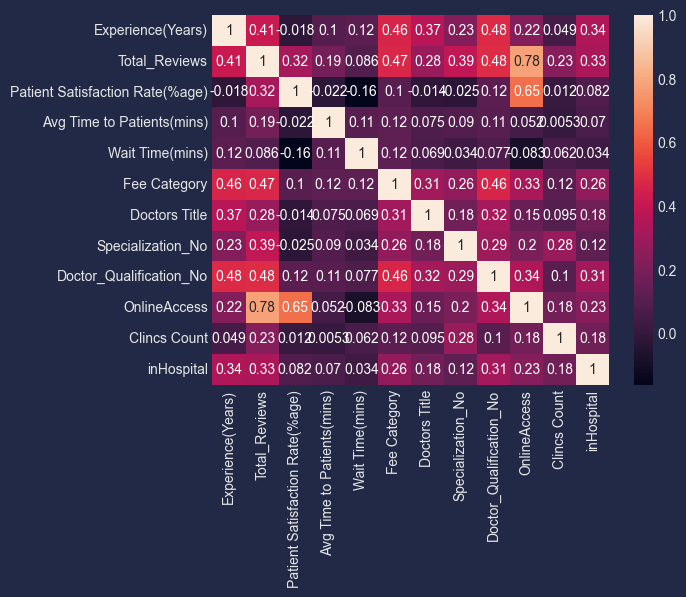

In [457]:
sns.heatmap(new_df.corr(method='spearman'),annot=True)

## Splitting Data

<AxesSubplot: xlabel='Fee Category', ylabel='count'>

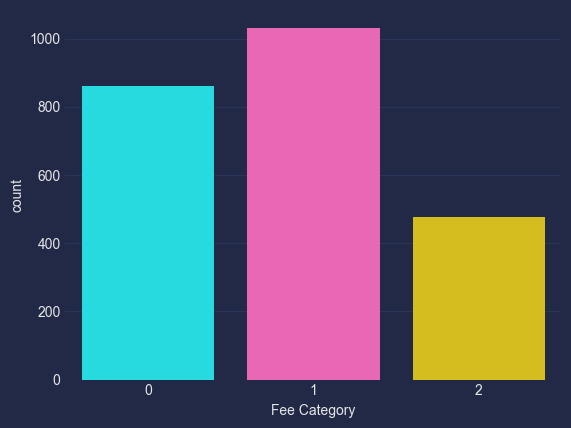

In [458]:
sns.countplot(data=new_df,x='Fee Category')

In [459]:
X=new_df.drop(columns=['Fee Category','Doctor Name','Hospital Address',
       'Doctors Link', 'OnlineAccess',
       'Clincs Count', 'inHospital'])
y=new_df['Fee Category']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4682,test_size=0.2,stratify=y)


In [460]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Experience(Years),1898.0,11.818230,8.695905,1.0,6.0,10.0,14.0,53.0
Total_Reviews,1898.0,88.150158,262.325799,0.0,0.0,8.0,52.0,3257.0
Patient Satisfaction Rate(%age),1898.0,96.703899,4.943945,33.0,94.0,98.0,100.0,100.0
Avg Time to Patients(mins),1898.0,14.045311,2.634680,3.0,14.0,14.0,15.0,50.0
Wait Time(mins),1898.0,11.175448,5.370342,0.0,10.0,11.0,11.0,69.0
Doctors Title,1898.0,1.349842,0.812950,1.0,1.0,1.0,1.0,4.0
Specialization_No,1898.0,1.190727,0.591165,1.0,1.0,1.0,1.0,5.0
Doctor_Qualification_No,1898.0,2.243941,1.114446,1.0,2.0,2.0,3.0,12.0


In [461]:
X.columns

Index(['City', 'Specialization', 'Doctor Qualification', 'Experience(Years)',
       'Total_Reviews', 'Patient Satisfaction Rate(%age)',
       'Avg Time to Patients(mins)', 'Wait Time(mins)', 'Doctors Title',
       'Specialization_No', 'Doctor_Qualification_No'],
      dtype='object')

In [462]:
pd.concat([X_test,y_test]).to_csv(r"TestData.csv",index=False)

## One hot encoding Cities and removing very common and uncommon Cities

In [463]:
enc = pd.get_dummies(X_train['City'], prefix='City')
l=enc.columns
for col in l:
    if enc[col].value_counts(normalize=True).values[0] >0.997:
        enc.drop(columns=col,inplace=True)

X_train=pd.concat([X_train.drop(columns='City'),enc],axis=1)

## One hot encoding Specialization and removing very common and uncommon Specializations

In [464]:
enc=X_train.Specialization.str.get_dummies(sep=',').add_prefix('Specialization_')
l=enc.columns
for col in l:
    if enc[col].value_counts(normalize=True).values[0] >0.997:
        enc.drop(columns=col,inplace=True)

X_train=pd.concat([X_train.drop(columns='Specialization'),enc],axis=1)

## One hot encoding Doctor Qualification and removing very common and uncommon qualifications

In [465]:
enc=X_train['Doctor Qualification'].str.get_dummies(sep=',').add_prefix('Qualification_')
l=enc.columns
for col in l:
    if enc[col].value_counts(normalize=True).values[0] >0.997:
        enc.drop(columns=col,inplace=True)

X_train=pd.concat([X_train.drop(columns=['Doctor Qualification']),enc],axis=1)

## Transforming 'Experience(Years)', 'Total_Reviews' using log function

In [466]:
X_train[['Experience(Years)', 'Total_Reviews']] = np.log(X_train[['Experience(Years)', 'Total_Reviews',]]+1)

In [467]:


enc = pd.get_dummies(X_test['City'], prefix='City')
enc1=X_test.Specialization.str.get_dummies(sep=',').add_prefix('Specialization_')
enc2=X_test['Doctor Qualification'].str.get_dummies(sep=',').add_prefix('Qualification_')

In [468]:


'''# 
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), ['column1', 'column3']),
#         ('cat', OneHotEncoder(), ['column2']),
#         ('drop_column', 'drop', ['column2'])  # Drop 'column2'
#     ],
#     remainder='passthrough'  # Pass through any columns not specified in transformers
# )

# # Create a pipeline with the preprocessor and a model (Logistic Regression)
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', LogisticRegression())
# ])

# # Fit the pipeline on the training data
# pipeline.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = pipeline.predict(X_test)"
'''

"""def Capping (X,):
    X_transformed = X.copy()
    for column in X_transformed.columns:
        if column=='Fee(PKR)' or column== 'Patient Satisfaction Rate(%age)' or column== 'Total_Reviews':
            continue
        elif (df[column].dtype != np.float64) & (df[column].dtype != np.int64):
            continue
        # p10 = np.percentile(df[column], 10)
        # p90 = np.percentile(df[column], 90)
        # df[column] = np.clip(df[column], p10, p90)
        # print(df[column].describe())
        df[column] = np.where(np.abs(df[column] - df[column].mean()) > 2 * np.std(df[column]), df[column].mean(), df[column])
    return X
def log_transform(X, columns_to_transform):
    X_transformed = X.copy()
    for col in columns_to_transform:
        print(X_transformed[col])
        X_transformed[col] = np.log1p(X_transformed[col])
        # print(X_transformed[col])
    return X_transformed

numeric_columns = new_df.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_transformer=Pipeline([
    # ('imputer', SimpleImputer(strategy='median')), # Handling missing values
    ('log_transform', FunctionTransformer(func=log_transform, kw_args={'columns_to_transform': ['Experience(Years)', 'Total_Reviews']})),
    # ("Standard Scaler",StandardScaler())
])

ohe=['City','Doctor Qualification',"Specialization"]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values if any
    ('onehot', OneHotEncoder(handle_unknown='ignore')),  # One-hot encode categorical variables
    
])
"""


X_test[['Experience(Years)', 'Total_Reviews']] = np.log(X_test[['Experience(Years)', 'Total_Reviews']]+1)


X_test=pd.concat([X_test.drop(columns=['City','Specialization','Doctor Qualification']),enc,enc1,enc2],axis=1)

X_test.reset_index(drop=True,inplace=True)
test = pd.DataFrame(columns=X_train.columns)
for col in test.columns:
        if col in X_test.columns:
            test[f"{col}"] = X_test[f"{col}"]
        else:
            test[col] = 0



In [469]:
test

,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Doctors Title,Specialization_No,Doctor_Qualification_No,City_ABBOTTABAD,City_ATTOCK,...,Qualification_mph,Qualification_mrcog,Qualification_mrcp,Qualification_mrcp{uk},Qualification_mrcs,Qualification_ms,Qualification_ms{neurosurgery},Qualification_ms{urology},Qualification_pgpn,Qualification_rmp
0,2.397895,0.000000,94,14,11,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.944439,2.484907,92,23,8,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.791759,4.174387,100,14,18,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.397895,0.000000,94,14,11,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.833213,1.609438,100,13,6,3,1,2,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,1.791759,3.988984,96,15,14,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
471,2.197225,2.197225,100,40,15,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
472,1.791759,0.000000,94,14,11,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
473,2.079442,3.951244,100,12,10,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [470]:
X_train["Doctors Title"].value_counts()

1    1528
2     193
4     117
3      60
Name: Doctors Title, dtype: int64

In [471]:
X_resampled["Doctors Title"].value_counts()

1    2028
2     214
4     172
3      64
Name: Doctors Title, dtype: int64

In [472]:
y_resampled.value_counts()

2    826
0    826
1    826
Name: Fee Category, dtype: int64

In [483]:
from sklearn.metrics import classification_report,confusion_matrix

model=RandomForestClassifier(random_state=612,max_depth=20,n_estimators=150)

model.fit(X_train, y_train)
y_pred=model.predict(test)
print("Train: ",model.score(X_train, y_train))
print("Test: ",model.score(test,y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Train:  0.9488935721812434
Test:  0.7221052631578947
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       173
           1       0.67      0.76      0.71       207
           2       0.85      0.56      0.68        95

    accuracy                           0.72       475
   macro avg       0.76      0.69      0.71       475
weighted avg       0.73      0.72      0.72       475



<AxesSubplot: >

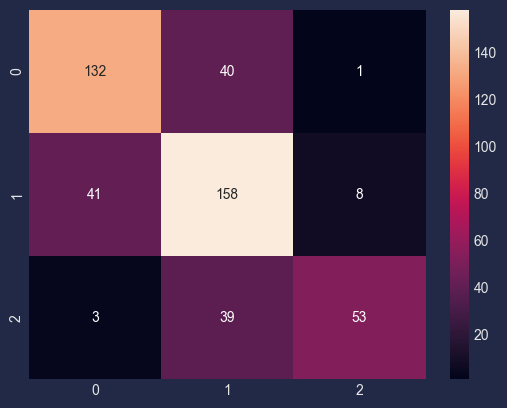

In [474]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="")

In [475]:
import joblib

joblib.dump(model, 'RF.pkl')

['RF.pkl']

In [476]:
# pd.concat([X_test,y_test]).to_csv(r"TestData.csv",index=False)

In [477]:
X_train.mean()

Experience(Years)                   2.341039
Total_Reviews                       2.373933
Patient Satisfaction Rate(%age)    96.703899
Avg Time to Patients(mins)         14.045311
Wait Time(mins)                    11.175448
                                     ...    
Qualification_ms                    0.004742
Qualification_ms{neurosurgery}      0.008957
Qualification_ms{urology}           0.011064
Qualification_pgpn                  0.003161
Qualification_rmp                   0.007376
Length: 144, dtype: float64

In [478]:
Qual_freq.keys()

dict_keys(['mbbs', 'fcps{otorhinolaryngologicent}', 'rmp', 'cfp{usa}', 'certifiedincovid19+', 'fcps{gynae&obstetrics}', 'fcps{dermatology}', 'certified{aestheticmedicine}', 'fcps', 'masterofsurgery{urology}', 'mcps{urology}', 'fcpsmedicine', 'traininggeriatricmedicineuk', 'chpe', 'associateprofessorofurology', 'mrcog', 'fcps{obstetrics&gynecology}', 'generalphysician', 'aestheticphysician', 'andmbbs', 'fcps{obstetricsandgynecology}', 'diplomainchildhealth{dch}', 'dtcd{t.b.&chestdiseases}', 'fcps{pulmonology}', 'fcps{urology}', 'fcpstrauma&orthopaedics', 'frcstrauma&orthopaedics', 'facs', 'atls', 'certifieddermatologist', 'facp', 'fcps{orthopedicsurgery}', 'mcps{surgery}', 'mcps{dermatology}', 'fcps{neurology}fcps{medicine}', 'mcps{medicine}', 'fcps{gastroenterology}', 'fcps{obstetrics&gynaecology}', 'msc{painmedicine}', 'fcps{neurology}', 'md', 'fcps{ophthalmology}', 'fellow{europeanboardurology}', 'mrcs', 'frcs{trauma&orthopedicsurgery}', 'fellowebot{europeanboardoforthopedic&traumato

In [479]:
pd.DataFrame(columns=X_train.columns).to_csv(r"TrainColumns.csv",index=False)

In [482]:
new_df["Doctor Qualification"]=="NULL"

0       False
1       False
2       False
3       False
4       False
        ...  
2368    False
2369    False
2370    False
2371    False
2372    False
Name: Doctor Qualification, Length: 2373, dtype: bool

In [ ]:
pd.read_csv("TrainColumns.csv")

,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Doctors Title,Specialization_No,Doctor_Qualification_No,City_ABBOTTABAD,City_ATTOCK,...,Qualification_mph,Qualification_mrcog,Qualification_mrcp,Qualification_mrcp{uk},Qualification_mrcs,Qualification_ms,Qualification_ms{neurosurgery},Qualification_ms{urology},Qualification_pgpn,Qualification_rmp


In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Experience(Years),1898.0,2.341039,0.661626,0.693147,1.94591,2.397895,2.708050,3.988984
Total_Reviews,1898.0,2.373933,2.082943,0.000000,0.00000,2.197225,3.970292,8.088869
Patient Satisfaction Rate(%age),1898.0,96.703899,4.943945,33.000000,94.00000,98.000000,100.000000,100.000000
Avg Time to Patients(mins),1898.0,14.045311,2.634680,3.000000,14.00000,14.000000,15.000000,50.000000
Wait Time(mins),1898.0,11.175448,5.370342,0.000000,10.00000,11.000000,11.000000,69.000000
Doctors Title,1898.0,1.349842,0.812950,1.000000,1.00000,1.000000,1.000000,4.000000
Specialization_No,1898.0,1.190727,0.591165,1.000000,1.00000,1.000000,1.000000,5.000000
Doctor_Qualification_No,1898.0,2.243941,1.114446,1.000000,2.00000,2.000000,3.000000,12.000000
City_ABBOTTABAD,1898.0,0.026870,0.161747,0.000000,0.00000,0.000000,0.000000,1.000000
City_ATTOCK,1898.0,0.005796,0.075928,0.000000,0.00000,0.000000,0.000000,1.000000


9.00000380397483